In [3]:
import os
os.system("sudo apt-get update")
os.system("sudo apt-get install -y python3-opencv")
os.system("pip install opencv-python")
os.system("pip install matplotlib")

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1463 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [17.5 MB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.6 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1796 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1070 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy/restricted amd64 Packages [164 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy/main amd64 Packages [1792 kB]
Get:13 http://archive.ubuntu.com/ubuntu jam

debconf: delaying package configuration, since apt-utils is not installed


Fetched 151 MB in 5min 22s (469 kB/s)
Selecting previously unselected package poppler-data.
(Reading database ... 77262 files and directories currently installed.)
Preparing to unpack .../000-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package gdal-data.
Preparing to unpack .../001-gdal-data_3.4.1+dfsg-1build4_all.deb ...
Unpacking gdal-data (3.4.1+dfsg-1build4) ...
Selecting previously unselected package libcdparanoia0:amd64.
Preparing to unpack .../002-libcdparanoia0_3.10.2+debian-14build2_amd64.deb ...
Unpacking libcdparanoia0:amd64 (3.10.2+debian-14build2) ...
Selecting previously unselected package liborc-0.4-0:amd64.
Preparing to unpack .../003-liborc-0.4-0_1%3a0.4.32-2_amd64.deb ...
Unpacking liborc-0.4-0:amd64 (1:0.4.32-2) ...
Selecting previously unselected package libgstreamer-plugins-base1.0-0:amd64.
Preparing to unpack .../004-libgstreamer-plugins-base1.0-0_1.20.1-1ubuntu0.1_amd64.deb ...
Unpacking libgstreamer-plu


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 674.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 40.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.6 MB/s eta 0:00:00:00:01



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


0

In [5]:
import sys
sys.path.append("..")
import cv2
import numpy as np
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [6]:
fp = "/work/cds-vis-data/data/img/terasse.jpeg"
image = cv2.imread(fp)
image.shape

(1576, 1200, 3)

In [8]:
#converting
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Syntax: ```cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

Parameters:

images: list of images as numpy arrays. All images must be of the same dtype and same size.

channels: list of the channels used to calculate the histograms.

mask: optional mask (8 bit array) of the same size as the input image.

histSize: histogram sizes in each dimension

ranges: Array of the dims arrays of the histogram bin boundaries in each dimension

hist: Output histogram

accumulate: accumulation flag, enables to compute a single histogram from several sets of arrays.

Return: It returns an array of histogram points of dtype float32.

In [18]:
hist_b = cv2.calcHist([image],[0],None,[255],[0,256])
hist_g = cv2.calcHist([image],[1],None,[255],[0,256])
hist_r = cv2.calcHist([image],[2],None,[255],[0,256])

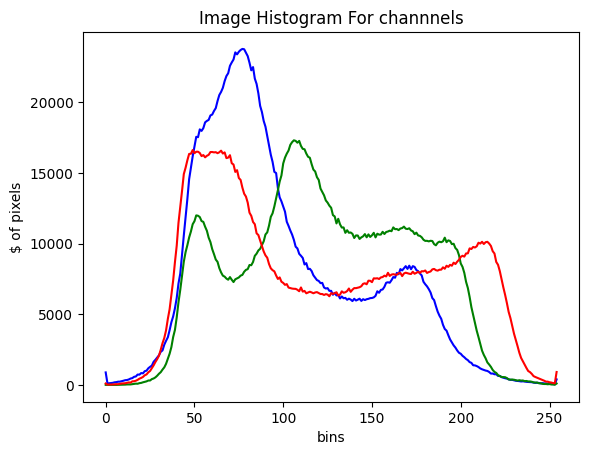

In [21]:
# plot the above computed histogram 
plt.figure()

plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.title('Image Histogram For channnels') 
plt.xlabel("bins")
plt.ylabel("$ of pixels")
plt.show()

In [59]:
def color_chs(image, names = 0, save = 0):
    hist_b = cv2.calcHist([image],[0],None,[255],[0,256])
    hist_g = cv2.calcHist([image],[1],None,[255],[0,256])
    hist_r = cv2.calcHist([image],[2],None,[255],[0,256])

    if names == 0:
        name = " "
    else:
        name = names

    # plot the above computed histogram 
    plt.figure()

    plt.plot(hist_b, color='b')
    plt.plot(hist_g, color='g')
    plt.plot(hist_r, color='r')
    plt.title('Image Histogram For '+ name +' channnels') 
    plt.xlabel("bins")
    plt.ylabel("$ of pixels")
    
    if save == 0:
        plt.show()
    else:
        plt.savefig(save + name + ".png")

def color_chs_1ch(image, colour):

    B, G, R = cv2.split(image)

    if colour == 0:
        col_chan = B
        col_img = "blue"
    elif colour == 1:
        col_chan = G
        col_img = "green"
    elif colour == 2:
        col_chan = R
        col_img = "red"
    else:
        print("invalid colour channel")

    hist_b = cv2.calcHist([col_chan],[0],None,[255],[0,256])

    # plot the above computed histogram 
    plt.figure()

    plt.plot(hist, color = col_img)
    plt.title('Image Histogram For ' + col_img + ' channnels') 
    plt.xlabel("bins")
    plt.ylabel("$ of pixels")
    plt.show()

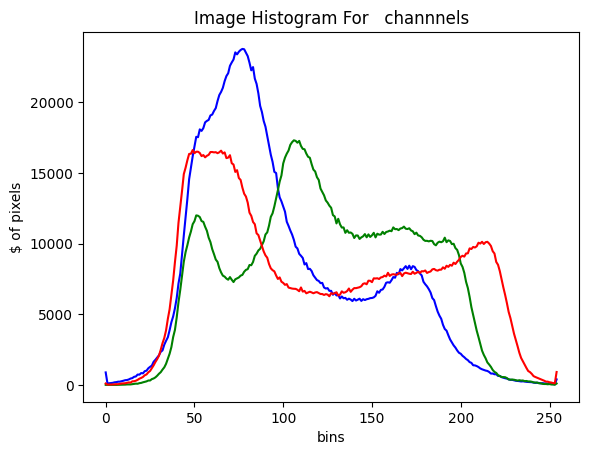

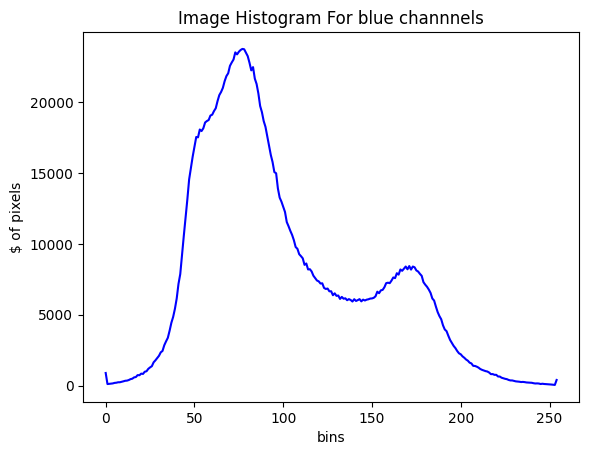

In [44]:
color_chs(image)
color_chs_1ch(image,0)

In [45]:
#multiple images 1 folder
fp = "/work/cds-vis-data/data/img/"
fp_s = os.listdir(fp)


image_list = []
name_list = []
for i in fp_s:
    filepath = "/work/cds-vis-data/data/img/" + i
    image = cv2.imread(filepath)
    names = i
    name_list.append(i)
    image_list.append(image)

    



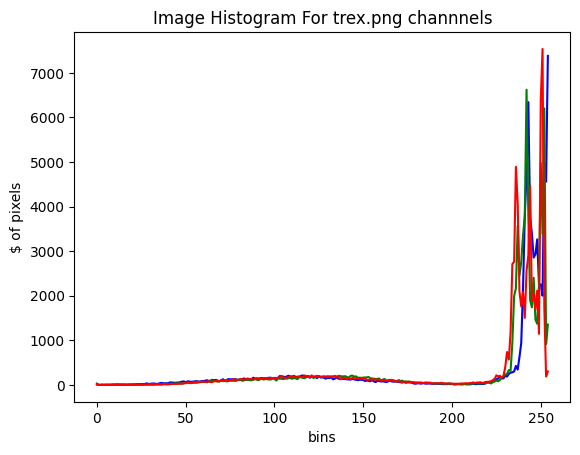

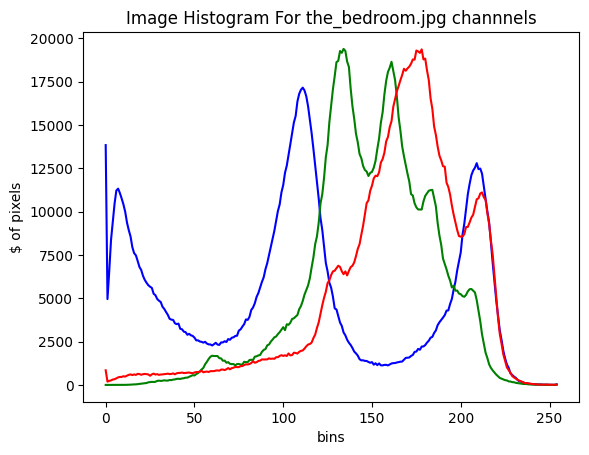

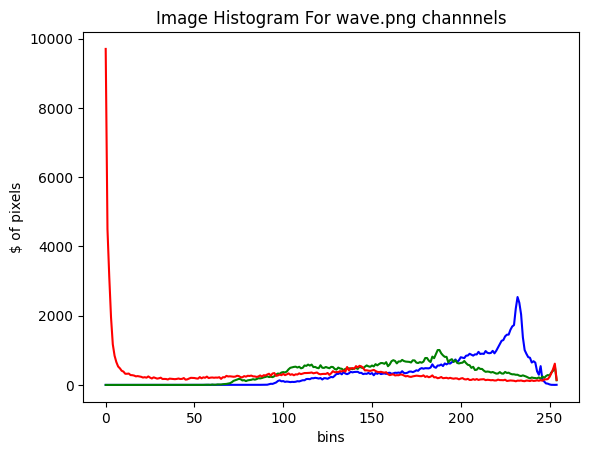

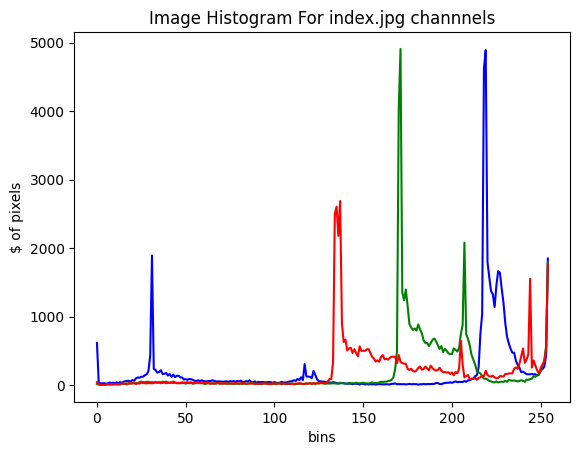

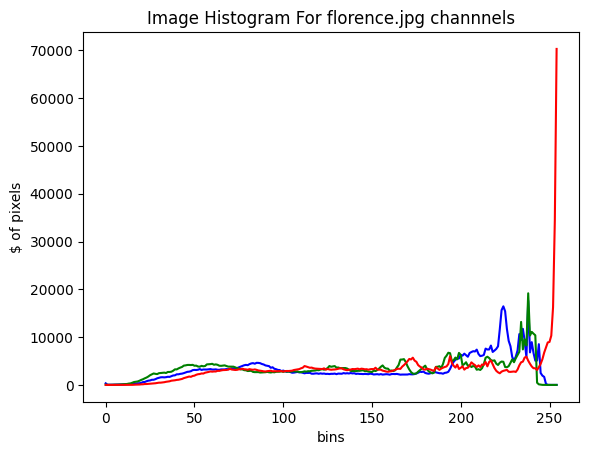

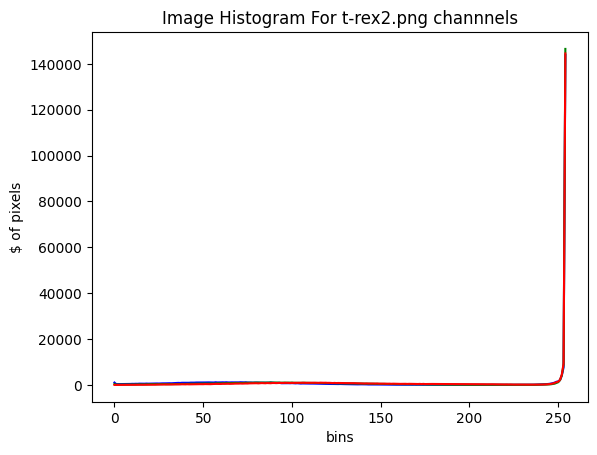

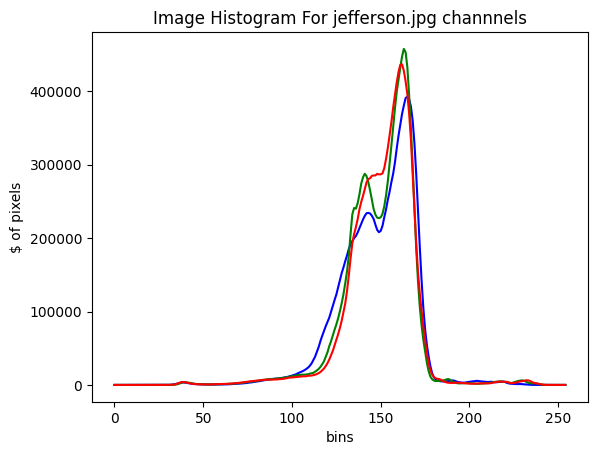

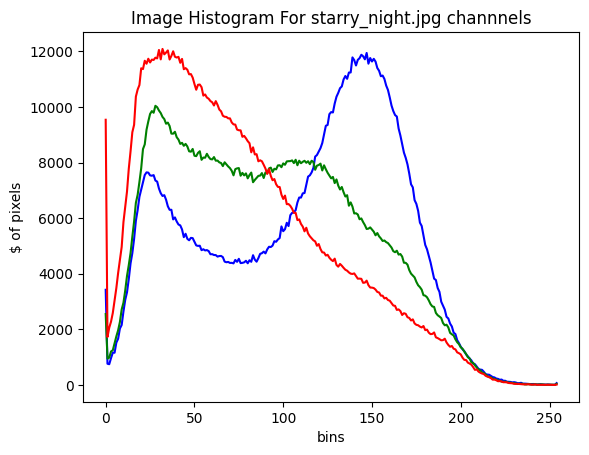

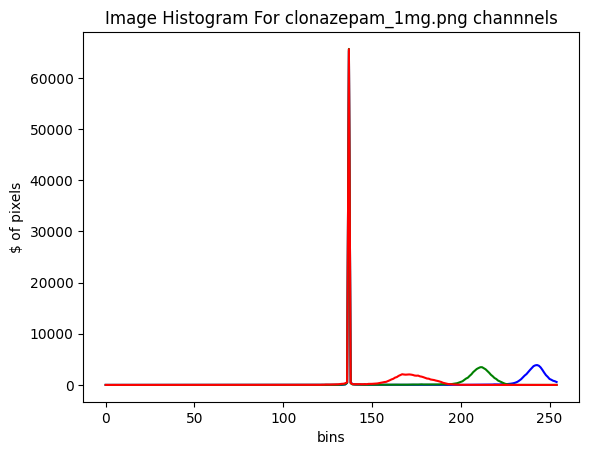

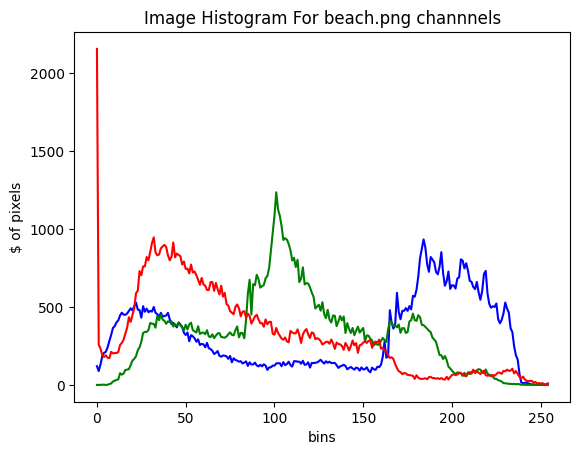

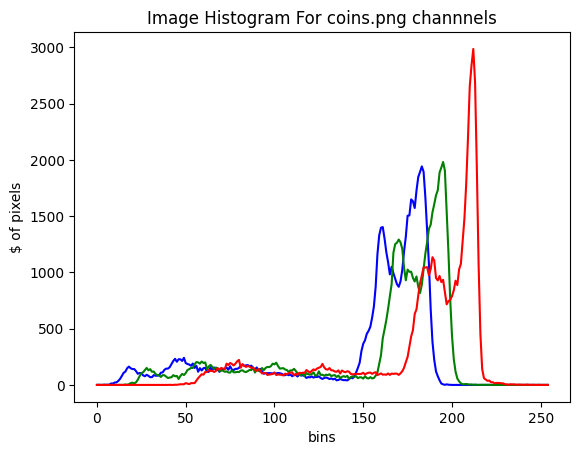

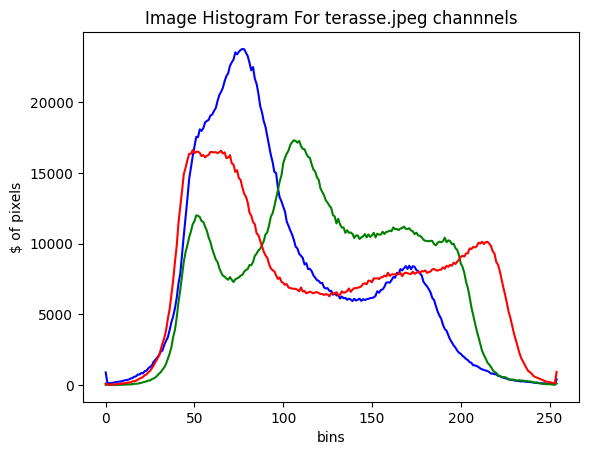

In [60]:
n = 0
for i in image_list:
    
    color_chs(i,names=name_list[n],
    save = "/work/lang_anal/CDS_lang/vis_putput/ch_comp/" + name_list[n] + ".png")
    n = n+1




In [ ]:
#save utputs
of = "/work/lang_anal/CDS_lang/putput/ch_comp/

In [54]:
trex = image_list[0]
trex_2 = image_list[5]

In [55]:
hist_all_t = cv2.calcHist([trex],[0,1,2],None,[255,255,255],[0,256,0,256,0,256])
hist_all_t_2 = cv2.calcHist([trex_2],[0,1,2],None,[255,255,255],[0,256,0,256,0,256])

In [56]:
### normalization 
#norm_pixel = (value-min)/ (max-min)

normalized_hist_t = cv2.normalize(hist_all_t, hist_all_t, 0, 1.0, cv2.NORM_MINMAX)

normalized_hist_t_2 = cv2.normalize(hist_all_t_2, hist_all_t_2, 0, 1.0, cv2.NORM_MINMAX)

In [58]:
round(cv2.compareHist(normalized_hist_t,normalized_hist_t_2,cv2.HISTCMP_CHISQR), 2)

33.76